# Speech Recognition with Delta-Delta's 
This model will convert recorded speech data into Mel-Spectrogram and then to Delta and finally the Delta-Delta's. 


In [306]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import librosa 
import librosa.display 
from IPython.display import Audio as play 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Organizing Data 
loading in a CSV that was created in EDA https://github.com/Jyve00/Emotion_Dectection/blob/main/EDA.ipynb

In [280]:
# using Pandas to load in csv for metadata on RAVDESS 
df = pd.read_csv('/Users/stephen/Emotion_Dectection/data/RAVDESS/metadata.csv', index_col=0)
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,actor_sex
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-02-02-01-01.wav,audio_only,speech,surprised,strong,Dogs are sitting by the door,first_repitition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-01-01-01-01.wav,audio_only,speech,surprised,normal,Kids are talking by the door,first_repitition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-02-01-01.wav,audio_only,speech,angry,normal,Dogs are sitting by the door,first_repitition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-01-02-02-01.wav,audio_only,speech,fearful,normal,Dogs are sitting by the door,second_repetition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-02-01-02-01.wav,audio_only,speech,fearful,strong,Kids are talking by the door,second_repetition,1,male


In [281]:
# for this model we only need the 'emotion' column which contains out labels/ target which there are 8 of. We'll also sort by classes 
df.drop(columns=['modality', 'vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'actor', 'actor_sex'], inplace=True)
df.sort_values(by='emotion')

,emotion
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_20/03-01-05-01-02-02-20.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_03/03-01-05-02-01-01-03.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_03/03-01-05-01-02-01-03.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_14/03-01-05-01-01-02-14.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_14/03-01-05-02-02-02-14.wav,angry
...,...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_13/03-01-08-02-02-01-13.wav,surprised
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_13/03-01-08-01-01-01-13.wav,surprised
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_06/03-01-08-02-01-02-06.wav,surprised
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_21/03-01-08-01-02-02-21.wav,surprised


In [282]:
df['Path'] = df.index
df

,emotion,Path
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-02-02-01-01.wav,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-01-01-01-01.wav,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-02-01-01.wav,angry,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-01-02-02-01.wav,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-02-01-02-01.wav,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
...,...,...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-03-02-02-02-23.wav,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-03-01-01-02-23.wav,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-02-02-01-01-23.wav,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-02-01-02-01-23.wav,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...


In [283]:
df = df[['emotion', 'Path']]
df.reset_index(level=0, inplace=True)

df

,index,emotion,Path
0,/Users/stephen/Emotion_Dectection/data/RAVDESS...,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1,/Users/stephen/Emotion_Dectection/data/RAVDESS...,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
2,/Users/stephen/Emotion_Dectection/data/RAVDESS...,angry,/Users/stephen/Emotion_Dectection/data/RAVDESS...
3,/Users/stephen/Emotion_Dectection/data/RAVDESS...,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
4,/Users/stephen/Emotion_Dectection/data/RAVDESS...,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
...,...,...,...
1375,/Users/stephen/Emotion_Dectection/data/RAVDESS...,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1376,/Users/stephen/Emotion_Dectection/data/RAVDESS...,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1377,/Users/stephen/Emotion_Dectection/data/RAVDESS...,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1378,/Users/stephen/Emotion_Dectection/data/RAVDESS...,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...


# Data Augmentation Functions 
It is common practice to transform audio data with data augmentation tools like time adding white noise, time-stretching and pitch shifts. 
We'll make duplicates of each wav file so our model will have more variable input data. 

In [311]:
# test ideas and visualize 

# randomly choosen file 
test_wav_path = '/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_04/03-01-05-02-01-02-04.wav'
test_signal, sr = librosa.load(test_wav_path, sr=16000) # 
play(test_signal, sr)


OSError: [Errno 9] Bad file descriptor

In [284]:
# adding Additive White Gausian Noise
def noise(data, SNR=10):   # https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
    #noise_amp = 0.035*np.random.uniform()*np.amax(data)
    #data = data + noise_amp*np.random.normal(size=data.shape[0])
    #return data

    # RMS value of signal 
    RMS_s = math.sqrt(np.mean(data**2))
    # RMS values of noise 
    RMS_n = math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    # using population formula for standard daviation 
    # mean = 0 STD = RMS
    STD_n = RMS_n 
    noise = np.random.normal(0, STD_n, data.shape[0])
    return data + noise 

# Time Strectching 
def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

#def shift(data):
    #shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    #return np.roll(data, shift_range)

# Pre Emphasis     info on Pre-Emphasis in speech recognition: https://wiki.aalto.fi/display/ITSP/Pre-emphasis
def pre_emphasize(data):
    return librosa.effects.preemphasis(data, coef=1)


def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sampling_rate, n_steps=3, bins_per_octave=24)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

In [285]:
# https://librosa.org/doc/main/generated/librosa.feature.delta.html

def extract_features(data):
    sample_rate = 16000

    result = np.array([])

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    
    # MFCC Delta
    mfcc_delta = librosa.feature.delta(mfcc)
    result = np.hstack((result, mfcc_delta)) # stacking horizontally

    # MFCC Delta-Delta
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    result = np.hstack((result, mfcc_delta2)) # stacking horizontally
    
    return result



def get_features(path): 
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    _data, sample_rate = librosa.load(path, sr=16000)
    data, index = librosa.effects.trim(_data)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    pre_emp_data = pre_emphasize(data)
    res4 = extract_features(pre_emp_data)
    result = np.vstack((result, res4)) # stacking vertically
    
    return result


In [286]:
X, Y = [], []
for path, emotion in zip(df.Path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 4 times as we have made 4 augmentation techniques on each audio file.
        Y.append(emotion)

In [287]:
len(X), len(Y), df.Path.shape

(5520, 5520, (1380,))

In [288]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,labels
0,-414.432892,73.462051,-11.302793,16.685219,-9.702396,-8.190188,-21.597328,-26.538494,-15.402532,0.425823,...,-24.662540,5.750321,1.249615,3.419778,0.499037,0.499037,0.499037,0.499037,0.499037,surprised
1,-260.038713,26.365194,9.754202,5.328629,-3.054421,-5.158979,-9.717306,-12.130523,-7.521470,-2.741872,...,-15.874747,2.276615,1.717372,1.507251,0.646369,0.646369,0.646369,0.646369,0.646369,surprised
2,-462.636292,69.210716,-10.702501,11.373688,-15.696045,-14.540933,-30.915854,-26.684658,-6.306084,-2.138210,...,-26.259726,6.417054,1.980872,2.857158,-0.188878,-0.188878,-0.188878,-0.188878,-0.188878,surprised
3,-478.682800,-17.627651,-31.855991,-1.770595,-22.777451,-17.569246,-29.836264,-31.922482,-20.713312,-2.877839,...,-28.251251,1.240744,0.647265,2.855595,0.106106,0.106106,0.106106,0.106106,0.106106,surprised
4,-490.662170,96.258797,-6.576852,21.453751,-2.627173,-8.602241,-17.967983,-17.648127,-19.343369,1.705160,...,-29.652498,6.608802,1.210094,3.367450,0.700175,0.700175,0.700175,0.700175,0.700175,surprised


In [289]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [290]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [291]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4140, 39), (4140, 8), (1380, 39), (1380, 8))

In [292]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4140, 39), (4140, 8), (1380, 39), (1380, 8))

In [293]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4140, 39, 1), (4140, 8), (1380, 39, 1), (1380, 8))

In [294]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 39, 256)           1536      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 20, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 20, 256)           327936    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 10, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 10, 128)           163968    
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 5, 128)          

In [295]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
65/65 [==============================] - 2s 29ms/step - loss: 1.9873 - accuracy: 0.2017 - val_loss: 1.9147 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 2/50
65/65 [==============================] - 2s 26ms/step - loss: 1.8892 - accuracy: 0.2529 - val_loss: 1.8575 - val_accuracy: 0.2565 - lr: 0.0010
Epoch 3/50
65/65 [==============================] - 2s 28ms/step - loss: 1.8440 - accuracy: 0.2773 - val_loss: 1.7966 - val_accuracy: 0.2942 - lr: 0.0010
Epoch 4/50
65/65 [==============================] - 2s 30ms/step - loss: 1.7924 - accuracy: 0.2855 - val_loss: 1.7783 - val_accuracy: 0.2993 - lr: 0.0010
Epoch 5/50
65/65 [==============================] - 2s 31ms/step - loss: 1.7501 - accuracy: 0.3118 - val_loss: 1.7294 - val_accuracy: 0.3246 - lr: 0.0010
Epoch 6/50
65/65 [==============================] - 2s 31ms/step - loss: 1.7227 - accuracy: 0.3266 - val_loss: 1.7231 - val_accuracy: 0.3058 - lr: 0.0010
Epoch 7/50
65/65 [==============================] - 2s 32ms/step - loss: 1.6

44/44 [==============================] - 0s 4ms/step - loss: 1.8482 - accuracy: 0.5174
Accuracy of our model on test data :  51.73913240432739 %


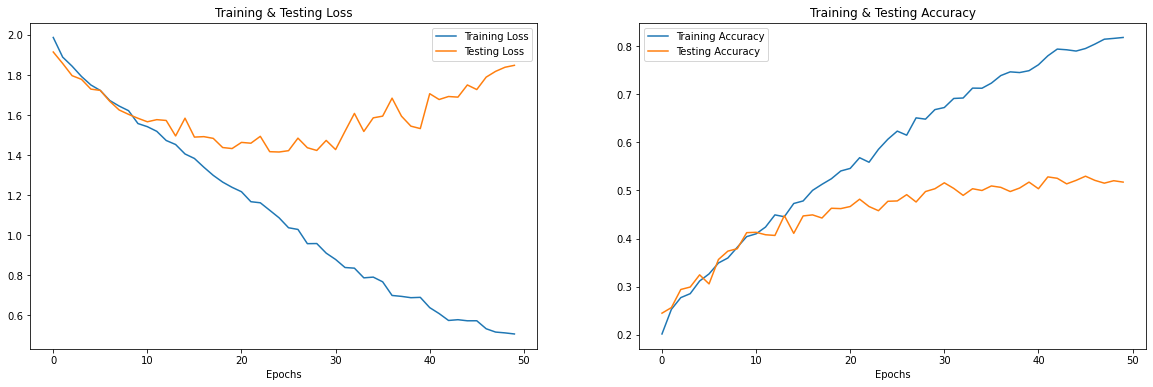

In [296]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [297]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [298]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,surprised,surprised
1,happy,happy
2,disgust,angry
3,happy,fearful
4,surprised,surprised
5,calm,calm
6,neutral,neutral
7,sad,fearful
8,angry,fearful
9,sad,calm


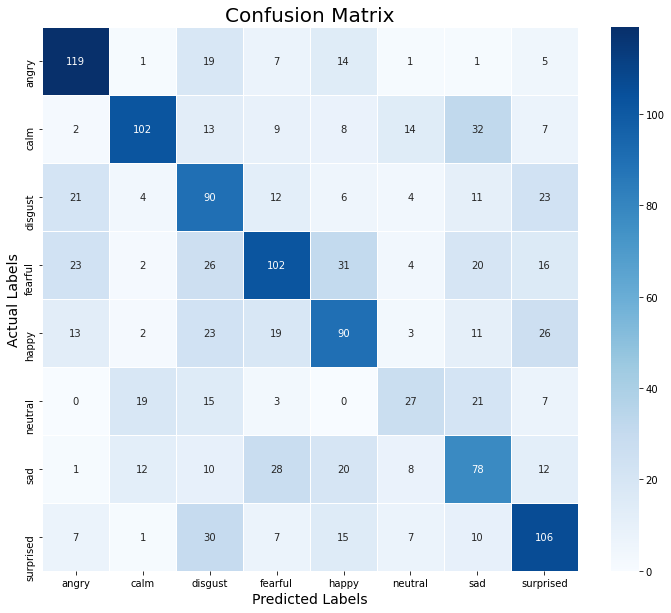

In [299]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [300]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.64      0.71      0.67       167
        calm       0.71      0.55      0.62       187
     disgust       0.40      0.53      0.45       171
     fearful       0.55      0.46      0.50       224
       happy       0.49      0.48      0.49       187
     neutral       0.40      0.29      0.34        92
         sad       0.42      0.46      0.44       169
   surprised       0.52      0.58      0.55       183

    accuracy                           0.52      1380
   macro avg       0.52      0.51      0.51      1380
weighted avg       0.53      0.52      0.52      1380

